## Tweets - Sentiment Analysis

In [28]:
# Import Libraries
# basic library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re, string
import string, subprocess

# machine learning library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# nlp library
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patricia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the data

In [4]:
# read data
data = pd.read_csv('./data/tweets.csv', encoding='latin')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [5]:
# Shape data
data.shape

(1048575, 6)

In [6]:
# The number of value count for each target columns
data['Target'].value_counts()

Target
0    799999
4    248576
Name: count, dtype: int64

In [7]:
# Replace 4 to 1, 0 -- NEGATIVE TWEET, 1-- POSITIVE TWEET

data['Target'] = data['Target'].replace(4, 1)
data['Target']

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: Target, Length: 1048575, dtype: int64

In [67]:
data['Target'].value_counts()

Target
0    799999
1    248576
Name: count, dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [69]:
# Check the null values there in the dataset.
data.isnull().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

# Balancing the dataset.

In [8]:
# Balancing the dataset
min_count = data['Target'].value_counts().min()
min_count
balanced_data = pd.concat([data[data['Target'] == target].sample(min_count,replace=False) for target in data['Target'].unique()])
data = balanced_data.sample(frac=1).reset_index(drop=True)
# Explore data
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497152 entries, 0 to 497151
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Target  497152 non-null  int64 
 1   ID      497152 non-null  int64 
 2   Date    497152 non-null  object
 3   flag    497152 non-null  object
 4   User    497152 non-null  object
 5   Text    497152 non-null  object
dtypes: int64(2), object(4)
memory usage: 22.8+ MB
None


## Visualization

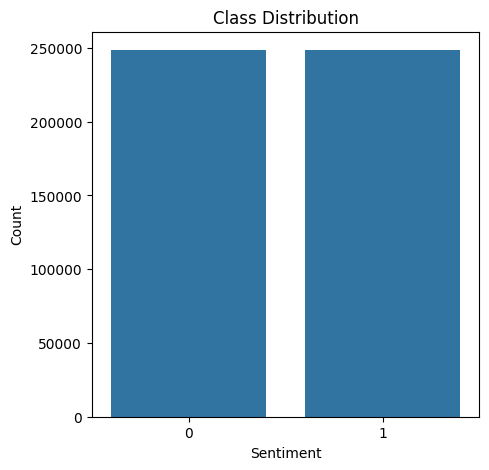

In [9]:
# Visualize class distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='Target' , data=data)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

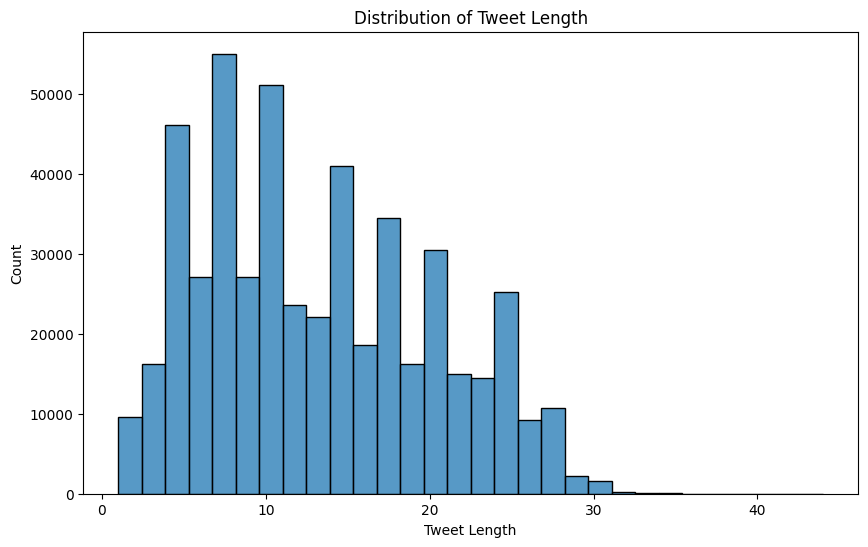

In [10]:
# Explore tweet length
data['Tweet_Length'] = data['Text'].apply(lambda x: len(x.split()))

# Visualize tweet length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Tweet_Length'], bins=30)
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [11]:
# Explore word frequency
all_words = ' '.join(data['Text'])
words = all_words.split()
word_freq = pd.Series(words).value_counts()

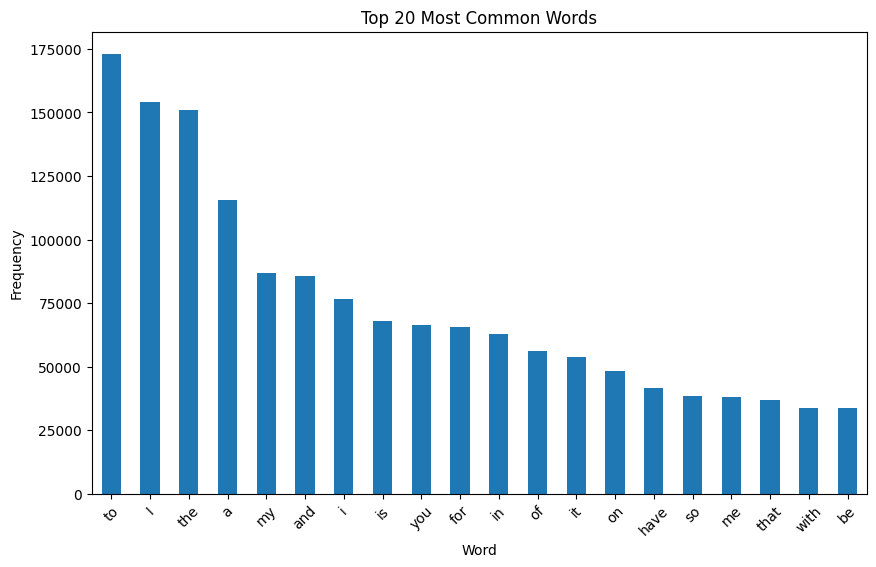

In [12]:
# Visualize top 20 most common words
plt.figure(figsize=(10, 6))
word_freq[:20].plot(kind='bar')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## NLP
### Clean Text

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
text = data['Text'].apply(lambda x:clean_text(x))
# make dictionary
text_ = {'clean_text': text}
# make dataframe
df_clean_text = pd.DataFrame.from_dict(text_)
df_clean_text.head()

,clean_text
0,iphone sync went bad and erased all the apps o...
1,swalkingtree hi sequoia be well
2,calebftsk wish i was there
3,xxkalishaxx i fink you should have to make thi...
4,freshdotdaily i like it


## Tokenization, Stop Words, Stemming

In [15]:
def remove_stopwords(text):
    #tokenization words
    words = nltk.word_tokenize(text)

    # remove meaningless words
    stop_words = nltk.corpus.stopwords.words('english')
    add_stop_words =    add_stop_words = ['u', 'im', 'um', 'aaaaand', 'aaronrva', 'aaw', 'ï¿½n', 'ï¿½tieï¿½', 'abl', 'abt']
    stop_words = stop_words + add_stop_words
    filtered_words = [word for word in words if word not in stop_words]
    
    # streaming word to base vocab
    stemmer = nltk.SnowballStemmer("english")
    filtered_words = [stemmer.stem(word) for word in filtered_words]
    return filtered_words

In [16]:
data['vectors'] = df_clean_text['clean_text'].apply(remove_stopwords)
data.head()

,Target,ID,Date,flag,User,Text,Tweet_Length,vectors
0,0,1824631318,Sun May 17 02:13:48 PDT 2009,NO_QUERY,hackedunit,iPhone sync went bad and erased all the apps o...,14,"[iphon, sync, went, bad, eras, app, except, tw..."
1,1,1836079367,Mon May 18 07:19:52 PDT 2009,NO_QUERY,happyseaurchin,@swalkingtree hi sequoia be well!,5,"[swalkingtre, hi, sequoia, well]"
2,0,2197314092,Tue Jun 16 13:37:21 PDT 2009,NO_QUERY,paulaalorenaa,@CalebFTSK wish I was there,5,"[calebftsk, wish]"
3,1,1771137324,Mon May 11 23:18:57 PDT 2009,NO_QUERY,carrot_girl,@xxKalishaxx I fink you should have to make th...,24,"[xxkalishaxx, fink, make, boat, see, inconvien..."
4,1,1572844133,Mon Apr 20 22:45:36 PDT 2009,NO_QUERY,Brittistheparty,@Freshdotdaily I like it!,4,"[freshdotdaili, like]"


In [18]:
data['Stemmer'] = [' '.join(x) for x in data['vectors']]

In [19]:
data.head()

,Target,ID,Date,flag,User,Text,Tweet_Length,vectors,Stemmer
0,0,1824631318,Sun May 17 02:13:48 PDT 2009,NO_QUERY,hackedunit,iPhone sync went bad and erased all the apps o...,14,"[iphon, sync, went, bad, eras, app, except, tw...",iphon sync went bad eras app except tweeti
1,1,1836079367,Mon May 18 07:19:52 PDT 2009,NO_QUERY,happyseaurchin,@swalkingtree hi sequoia be well!,5,"[swalkingtre, hi, sequoia, well]",swalkingtre hi sequoia well
2,0,2197314092,Tue Jun 16 13:37:21 PDT 2009,NO_QUERY,paulaalorenaa,@CalebFTSK wish I was there,5,"[calebftsk, wish]",calebftsk wish
3,1,1771137324,Mon May 11 23:18:57 PDT 2009,NO_QUERY,carrot_girl,@xxKalishaxx I fink you should have to make th...,24,"[xxkalishaxx, fink, make, boat, see, inconvien...",xxkalishaxx fink make boat see inconvient one ...
4,1,1572844133,Mon Apr 20 22:45:36 PDT 2009,NO_QUERY,Brittistheparty,@Freshdotdaily I like it!,4,"[freshdotdaili, like]",freshdotdaili like


### Model

In [21]:
# separation
X = data['Stemmer'].values
Y = data['Target'].values

In [22]:
#Spitting data to training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(497152,) (397721,) (99431,)


In [26]:
#feature_extraction(text data to numeric data)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [29]:
# Training ML model using Logistic Regression

model = LogisticRegression(max_iter=1000)

In [30]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [31]:
#model evaluation (Accuracy Score on training data)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [32]:
print('Accuracy score on training data : ' , training_data_accuracy)

Accuracy score on training data :  0.824386944616955


In [33]:
#model evaluation (Accuracy Score on test data)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [34]:
print('Accuracy score on test data : ' , test_data_accuracy)

Accuracy score on test data :  0.7818084903098631
